# Problema 1
Descripción:
En este problema, se presenta un conjunto de datos que contiene información sobre el rendimiento académico de estudiantes universitarios, así como diversos factores que podrían influir en él. El objetivo es construir un modelo de regresión utilizando redes neuronales para predecir el índice de rendimiento académico de los estudiantes basado en las características proporcionadas.


### Dataset:
https://drive.google.com/file/d/1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc/view?usp=drive_link

El dataset proporcionado incluye las siguientes variables para cada estudiante:

- Hours Studied: El número total de horas dedicadas al estudio por cada estudiante.
- Previous Scores: Las puntuaciones obtenidas por los estudiantes en exámenes previos.
- Extracurricular Activities: Si el estudiante participa en actividades extracurriculares (Sí o No).
- Sleep Hours: El número promedio de horas de sueño que el estudiante tuvo por día.
- Sample Question Papers Practiced: El número de cuestionarios de muestra que el estudiante practicó.

Además, el dataset incluye la variable objetivo:

- Performance Index: Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.

### Objetivo:
Utilizando el dataset proporcionado, el objetivo es construir un modelo de regresión utilizando redes neuronales que pueda predecir con precisión el índice de rendimiento académico de los estudiantes. Se debe entrenar y evaluar el modelo utilizando técnicas adecuadas de validación y métricas de evaluación de regresión 

## Librerias

In [ ]:
# %pip install -U seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from pathlib import Path
from keras.layers import Input, RandomFlip, RandomContrast, BatchNormalization, RandomTranslation, Flatten, Dropout
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, GlobalMaxPooling2D, Rescaling
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

## Importación del dataset

In [2]:
df_raw = pd.read_csv("https://github.com/nacho-gonz/TPs-AA2/raw/main/Archivos/Student_Performance.csv")
df_raw

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
df_raw_x = df_raw.drop("Performance Index", axis=1)
df_raw_x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5
...,...,...,...,...,...
9995,1,49,Yes,4,2
9996,7,64,Yes,8,5
9997,6,83,Yes,8,5
9998,9,97,Yes,7,0


In [4]:
df_y = df_raw['Performance Index']
df_y 

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [5]:
x_temp, x_test, y_temp, y_test = train_test_split(df_raw_x, df_y, test_size=0.2,random_state=123)

x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=321)

print(x_train.shape, x_val.shape, x_test.shape)

xy_temp = x_temp.copy()
xy_temp['Performance Index'] = df_y

(6000, 5) (2000, 5) (2000, 5)


## Análisis exploratorio

In [7]:
x_train.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,4.994667,69.408167,6.535167,4.568667
std,2.598993,17.377981,1.702130,2.863620
min,1.000000,40.000000,4.000000,0.000000
25%,3.000000,54.000000,5.000000,2.000000
50%,5.000000,69.000000,7.000000,5.000000
75%,7.000000,85.000000,8.000000,7.000000
max,9.000000,99.000000,9.000000,9.000000


In [8]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 1670 to 9914
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     6000 non-null   int64 
 1   Previous Scores                   6000 non-null   int64 
 2   Extracurricular Activities        6000 non-null   object
 3   Sleep Hours                       6000 non-null   int64 
 4   Sample Question Papers Practiced  6000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 281.2+ KB


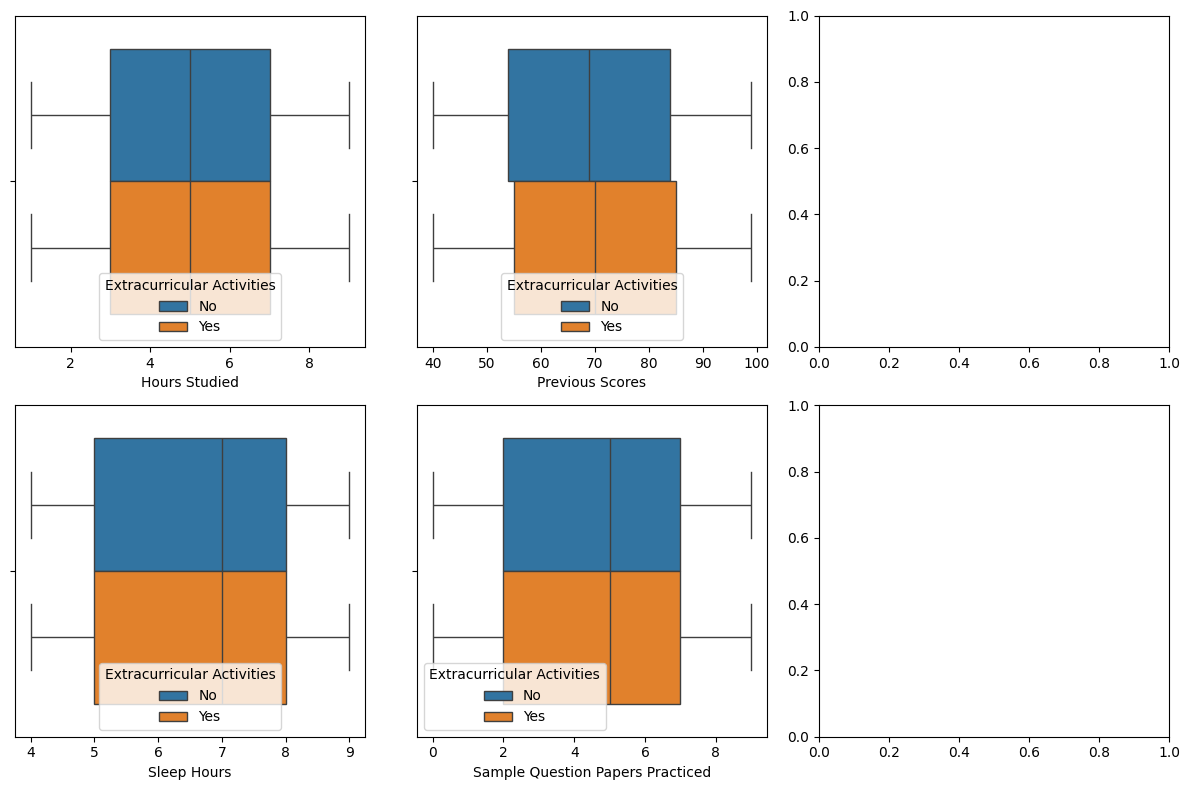

In [14]:
fig, axes = plt.subplots(2,3)

for name, ax in zip(x_temp, axes.flatten()):
    if name != 'Extracurricular Activities':
        sns.boxplot(x=name, data=x_temp, orient='h', ax=ax, hue='Extracurricular Activities')

fig.set_size_inches(12,8)
plt.tight_layout()
plt.show()

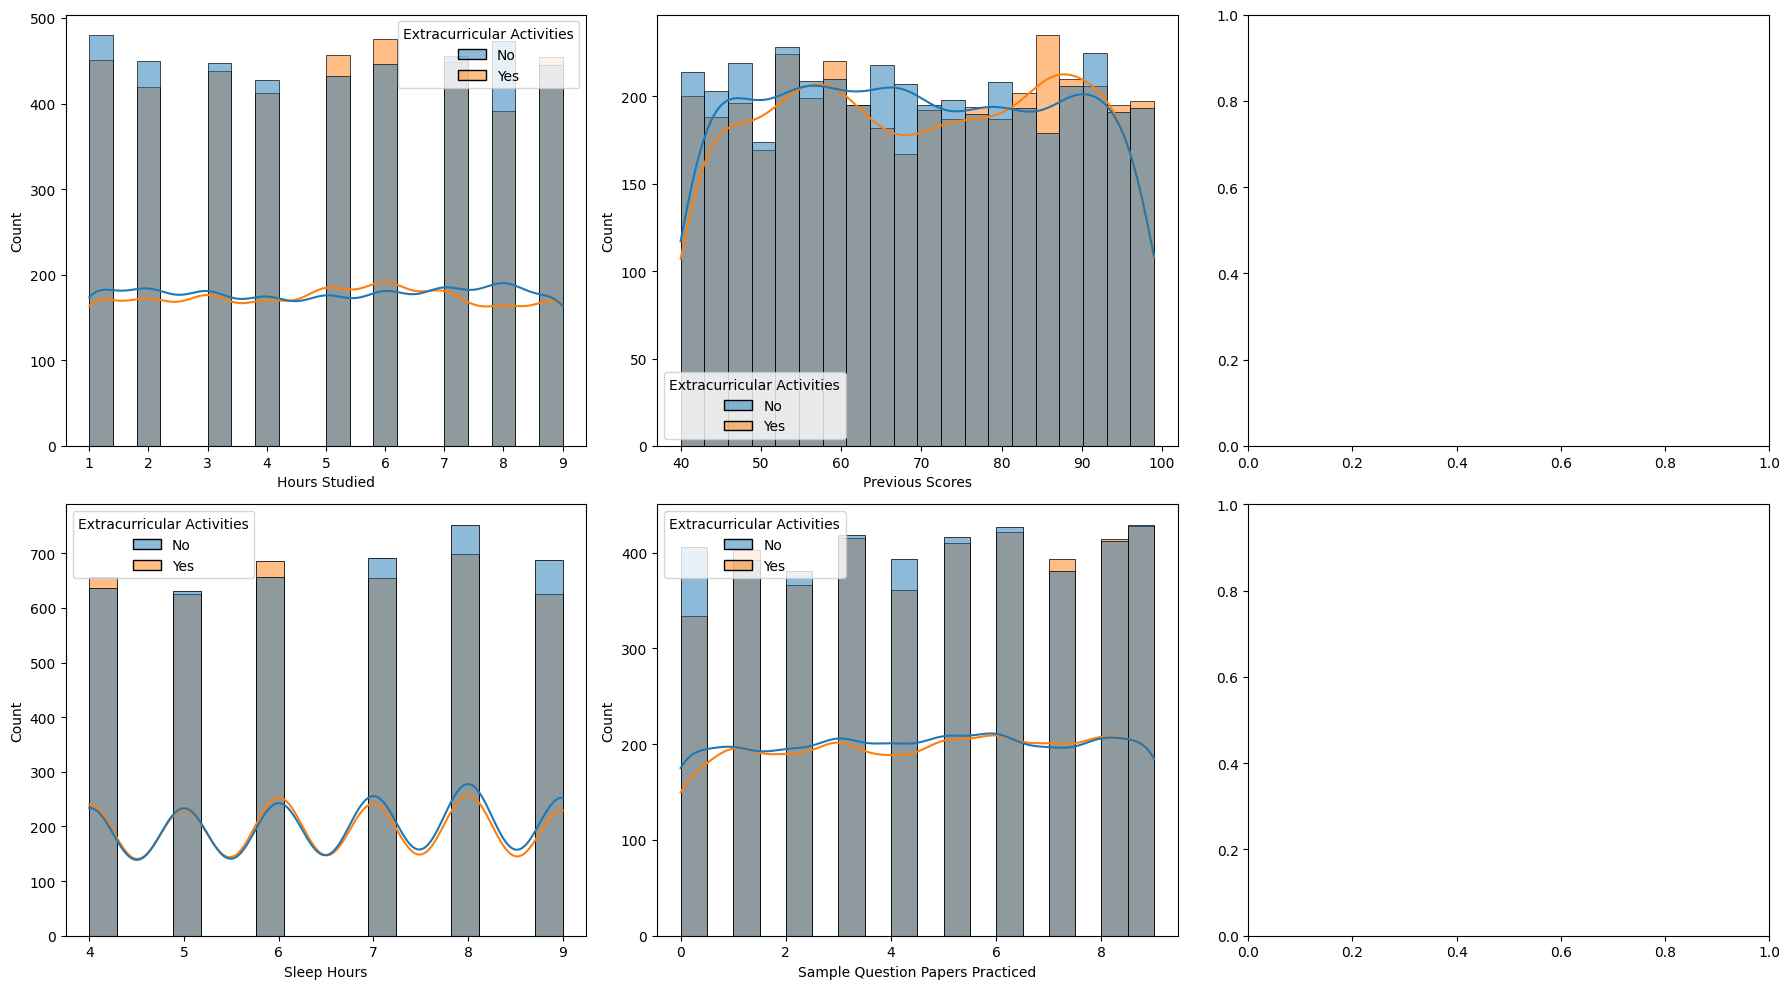

In [15]:
fig2, axes2 = plt.subplots(2,3)

for name, ax in zip(x_temp, axes2.flatten()):
    if name != 'Extracurricular Activities':
        sns.histplot(x=name, data=x_temp, ax=ax,kde=True, hue='Extracurricular Activities')

fig2.set_size_inches(18,10)
plt.tight_layout()
plt.show()

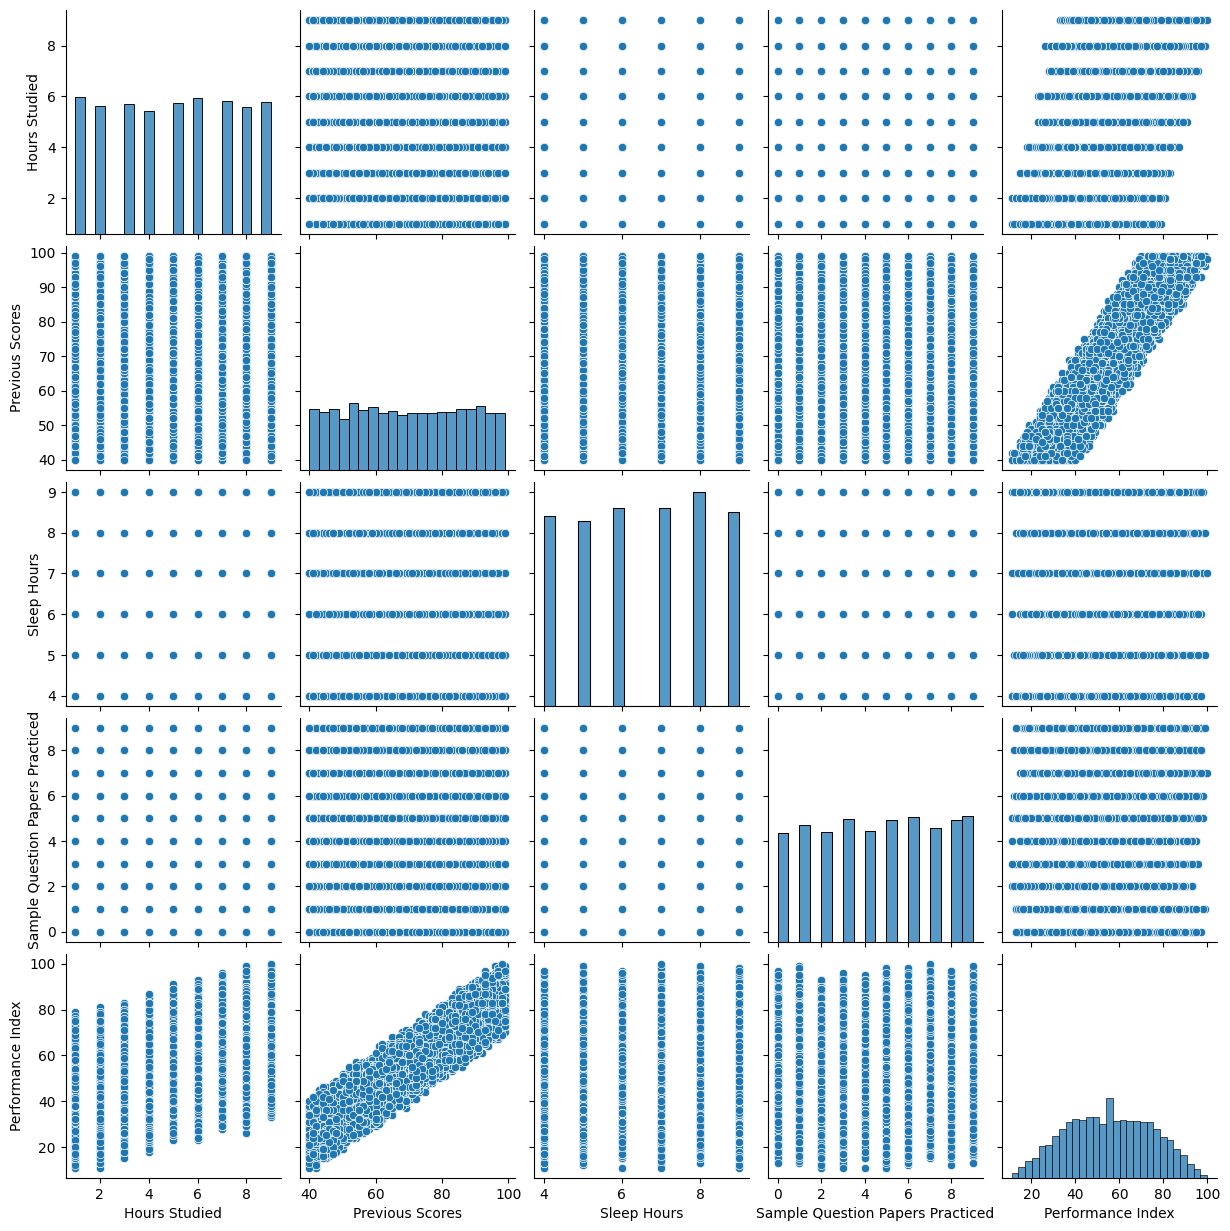

In [11]:
sns.pairplot(xy_temp.drop(columns='Extracurricular Activities'))
plt.show()

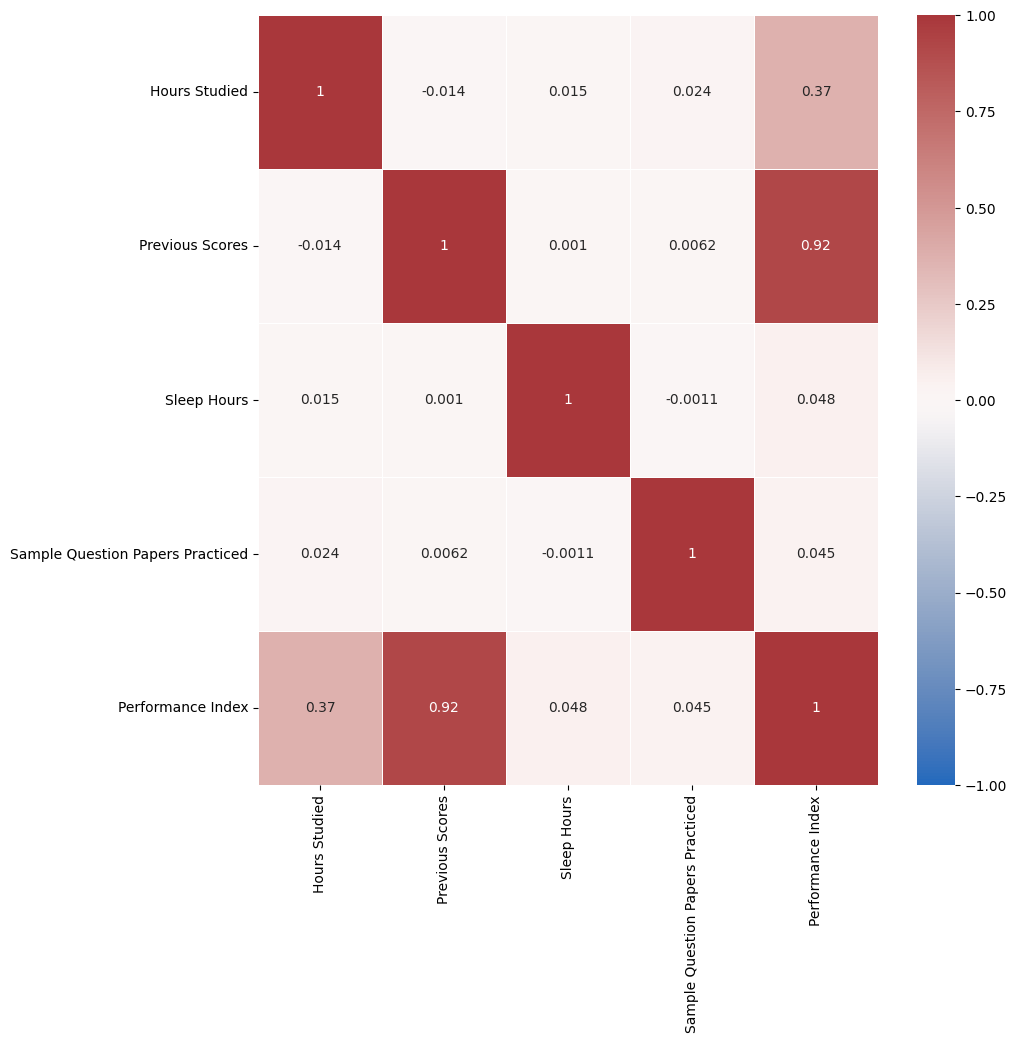

In [12]:
corrmat = xy_temp.drop(columns='Extracurricular Activities').corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax=1,vmin=-1, annot=True, linewidths=.5, ax=ax, cmap='vlag')
plt.show()

## Escalado y codificado

In [6]:
x_train_codif = pd.get_dummies(x_train, columns=['Extracurricular Activities'], drop_first=True)
x_val_codif = pd.get_dummies(x_val, columns=['Extracurricular Activities'], drop_first=True)
x_test_codif = pd.get_dummies(x_test, columns=['Extracurricular Activities'], drop_first=True)

In [7]:
scaler = MinMaxScaler().set_output(transform='pandas')
x_train_esc = scaler.fit_transform(x_train_codif[['Hours Studied', 'Previous Scores','Sleep Hours', 'Sample Question Papers Practiced']])
x_val_esc = scaler.transform(x_val_codif[['Hours Studied', 'Previous Scores','Sleep Hours', 'Sample Question Papers Practiced']])
x_test_esc = scaler.transform(x_test_codif[['Hours Studied', 'Previous Scores','Sleep Hours', 'Sample Question Papers Practiced']])
x_train_esc_codif = pd.concat([x_train_esc, x_train_codif['Extracurricular Activities_Yes']], axis=1)
x_val_esc_codif = pd.concat([x_val_esc, x_val_codif['Extracurricular Activities_Yes']], axis=1)
x_test_esc_codif = pd.concat([x_test_esc, x_test_codif['Extracurricular Activities_Yes']], axis=1)

In [34]:
x_train_esc_codif

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
1670,0.125,0.694915,0.6,0.222222,False
8292,0.625,0.033898,0.8,0.111111,False
2849,0.125,0.474576,0.2,0.333333,True
2814,0.750,0.745763,0.0,0.777778,True
8677,0.375,0.033898,0.6,0.222222,True
...,...,...,...,...,...
5742,0.000,0.474576,0.6,0.888889,False
1383,0.375,0.033898,0.2,0.444444,False
4622,0.625,0.271186,0.0,1.000000,False
2744,0.000,0.016949,0.2,0.555556,True


## Regresión mediante redes neuronales

In [8]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

In [33]:
def build_model(input_shape):
    i = Input(input_shape, dtype=tf.float32)

    x = Dense(16)(i)
    x = Activation('linear')(x)
    x = Dropout(0.1)(x)

    # x = Dense(64)(x)
    # x = Activation('linear')(x)
    # x = Dropout(0.3)(x)

    # x = Dense(128)(x)
    # x = Activation('linear')(x)
    # x = Dropout(0.3)(x)

    output = Dense(1, activation='linear')(x)


    return tf.keras.Model(inputs=i, outputs=output)


In [30]:
import tensorflow.keras.backend as K

def r2_score(y_true, y_pred):
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())

In [35]:
print("Building model")
model = build_model(input_shape=(x_train_esc_codif.shape[1],))

model.compile(
    optimizer='adam',
    loss="mse",
    metrics=['mae', r2_score])

Building model


In [36]:
early_stopping = EarlyStopping(monitor="val_loss", patience=10, verbose=0, mode="min", restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(
    monitor="loss", factor=0.5, patience=8, verbose=1, min_delta=1e-4, mode="min"
)

In [37]:
history = model.fit(
    x_train_esc_codif,
    y_train,
    validation_data=(x_val_esc_codif, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[reduce_lr, early_stopping],
)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3243.2529 - mae: 53.5363 - r2_score: -8.2196 - val_loss: 2780.8306 - val_mae: 49.3094 - val_r2_score: -7.1378 - learning_rate: 0.0010
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2458.4082 - mae: 45.9584 - r2_score: -6.1386 - val_loss: 1622.3044 - val_mae: 36.2078 - val_r2_score: -3.7463 - learning_rate: 0.0010
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1290.4135 - mae: 31.4543 - r2_score: -2.6404 - val_loss: 687.0300 - val_mae: 21.8358 - val_r2_score: -1.0042 - learning_rate: 0.0010
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 565.1079 - mae: 19.5055 - r2_score: -0.6324 - val_loss: 345.3829 - val_mae: 15.3659 - val_r2_score: 0.0015 - learning_rate: 0.0010
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 324.1329 - mae: 14.6208 - r2_score: 0.0641 - val_loss: 273.4885 - val_mae: 13.6936 - val_r2_score: 0.2143 - learning_rate: 0.0010
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━

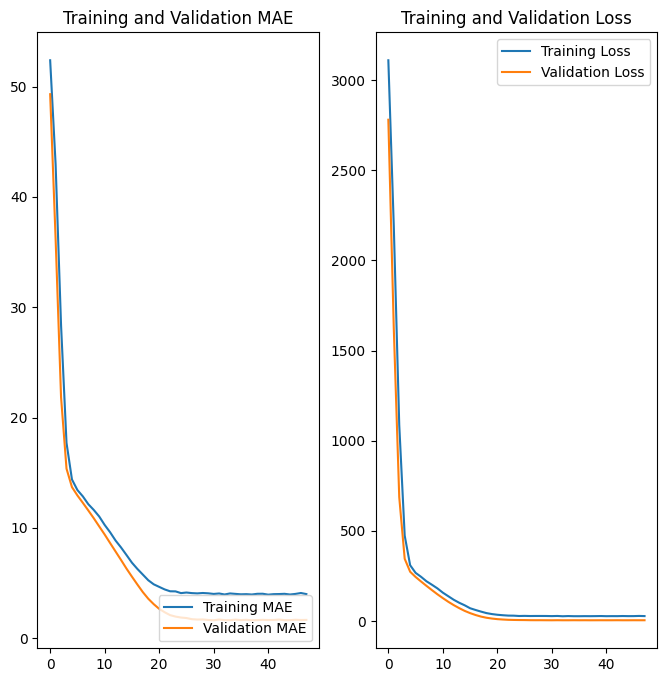

In [38]:
acc = history.history['mae']
val_acc = history.history['val_mae']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training MAE')
plt.plot(epochs_range, val_acc, label='Validation MAE')
plt.legend(loc='lower right')
plt.title('Training and Validation MAE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

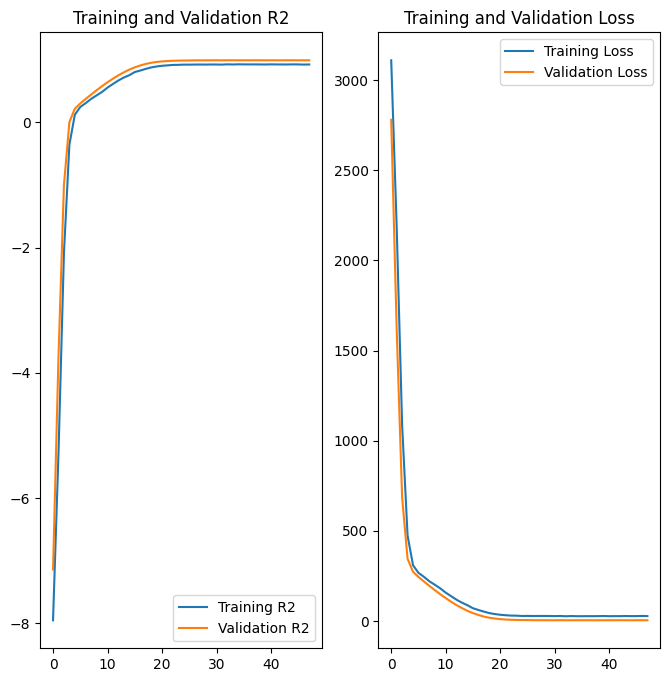

In [39]:
acc = history.history['r2_score']
val_acc = history.history['val_r2_score']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training R2')
plt.plot(epochs_range, val_acc, label='Validation R2')
plt.legend(loc='lower right')
plt.title('Training and Validation R2')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
predictions = model.predict(x_test_esc_codif)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


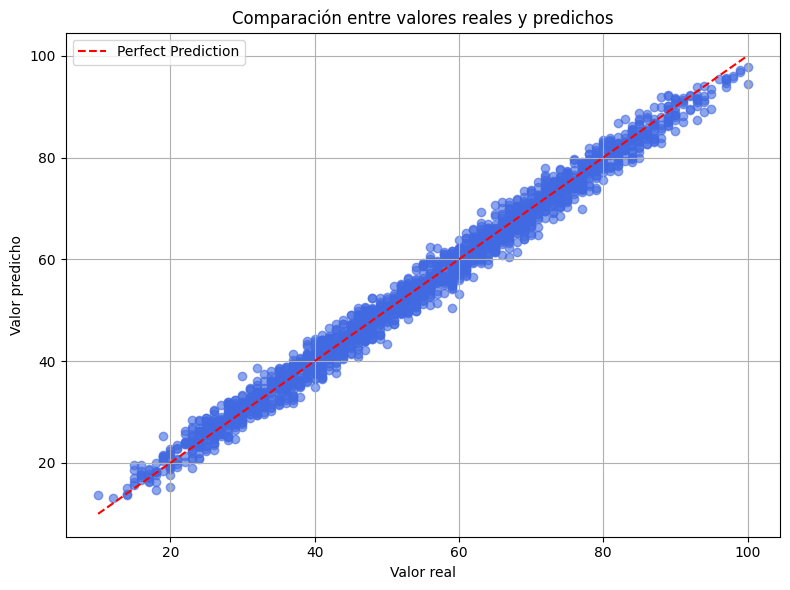

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Comparación entre valores reales y predichos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()